In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## We can see taht in this model building tere is no use of custimer ID
# therefore we will drop that column

#df.drop(labels='customerID', axis = 'rows', inplace=True)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values ##ye string me he toh isko number me convert karna hoga

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
## This column is having null values 
## So we will drop that particular rows with null values

#First this gave error : pd.to_numeric(df.TotalCharges)
pd.to_numeric(df.TotalCharges, errors='coerce').isnull().shape

(7043,)

In [6]:
df1 = df[df.TotalCharges != ' ']
df1.shape      ## Shows us that total 7043-7032 rows had null values

(7032, 21)

In [7]:
## Now convert from object to numeric form
df1.TotalCharges =  pd.to_numeric(df1.TotalCharges)

C:\Users\niraj\AppData\Local\Temp\ipykernel_8344\248586121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges =  pd.to_numeric(df1.TotalCharges)


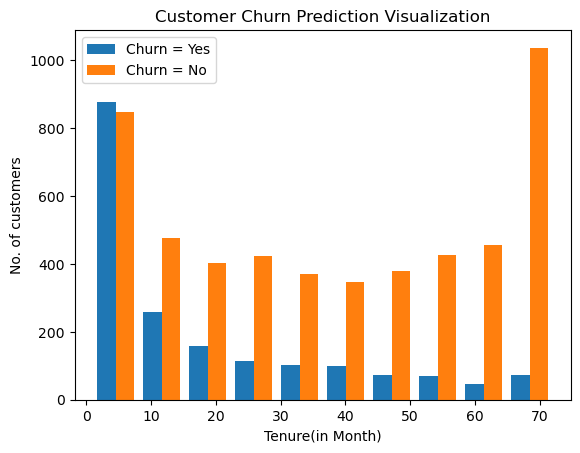

In [8]:
## We can observe taht we play with "Tenure"....
#Tenure means the loyal customers who have stayed with us for a long time....
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure(in Month)")
plt.ylabel("No. of customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

In [9]:
for column in df1:
    if df1[column].dtypes == 'object':
            print(f'{column} : {df1[column].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [10]:
## Not data ko ache se modify karo....Unwanted chizo ko nikalo..
## Do data cleaning
#pd.options.mode.chained_assignment = None  # default='warn'
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\Users\niraj\AppData\Local\Temp\ipykernel_8344\409929640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
C:\Users\niraj\AppData\Local\Temp\ipykernel_8344\409929640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [11]:
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_col : 
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)
    
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

C:\Users\niraj\AppData\Local\Temp\ipykernel_8344\914804813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)
C:\Users\niraj\AppData\Local\Temp\ipykernel_8344\914804813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)


In [12]:
## Now we have to do one hot encoding..
## For this you can use dummies library of pandas

df2 = pd.get_dummies(data = df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [15]:
df2.drop(['customerID'], axis = 1, inplace=True)
cols_to_scale = ['tenure', 'MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [16]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
X = df2.drop('Churn', axis = 'columns')
Y = df2['Churn']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(25,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7378
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7863
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7975
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.7963
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8028
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8062
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8062
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8084
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8091
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8112

In [26]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7889


[0.4410058259963989, 0.7889125943183899]

In [30]:
yp = model.predict(X_test)

#For the guven prediction if >0.5 the  convert to 1 otherwise 0
y_pred = []
for element in yp :
    if element > 0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)

y_pred[:10]

44/44 [==============================] - 0s 1ms/step


[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [31]:
Y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'truth')

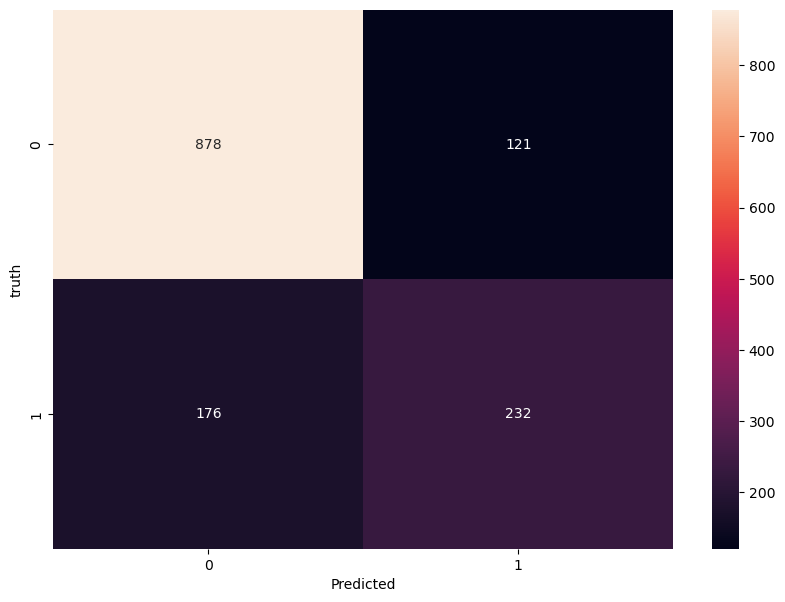

In [35]:
## Ye seaborn vali husiyari bus metrics ko sundar dikhane ke liye he..

import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('truth')